<a href="https://colab.research.google.com/github/nestorvqz/olympicGames/blob/main/OlimpicGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import json
import numpy as np
import matplotlib.pyplot as pp

In [3]:
! pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
! pip uninstall shapely
! pip install shapely --no-binary shapely

Found existing installation: Shapely 1.8.4
Uninstalling Shapely-1.8.4:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.8.4.dist-info/*
    /usr/local/lib/python3.7/dist-packages/Shapely.libs/libgeos-35e678a0.so.3.10.3
    /usr/local/lib/python3.7/dist-packages/Shapely.libs/libgeos_c-c8ec7514.so.1.16.1
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.8.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 8.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.4-cp37-cp37m-linux_x86_64.whl size=669438 sha256=deb8ba4ceb09379edef7d7f92619d7cf9d79c43b3b772b0ee3a777f36726d44e
  Stored in directory: /root/.cache/pip/wheels/0b/f0/55/139a0ab07fbf91378f9b

In [3]:
import geopy
import cartopy

In [4]:
import requests
from bs4 import BeautifulSoup
# URL on the Github where the csv files are stored
github_url = 'https://raw.githubusercontent.com/nestorvqz/olimpicGames/main/games.txt'  # change USERNAME, REPOSITORY and FOLDER with actual name

result = requests.get(github_url)


In [5]:
fileResult=result.text


In [6]:
cities, years = [], []  # note "tuple unrolling" assignment  
games = fileResult.split('\n')

for game in games[:-1]:

    word = game.split()
    city = ' '.join(word[:-1])
    year = word[-1].strip('()')

    cities.append(city)
    years.append(year)
    print(game)

Athens (1896)
Paris (1900)
St Louis (1904)
London (1908)
Stockholm (1912)
Antwerp (1920)
Paris (1924)
Amsterdam (1928)
Los Angeles (1932)
Berlin (1936)
London (1948)
Helsinki (1952)
Melbourne / Stockholm (1956)
Rome (1960)
Tokyo (1964)
Mexico (1968)
Munich (1972)
Montreal (1976)
Moscow (1980)
Los Angeles (1984)
Seoul (1988)
Barcelona (1992)
Atlanta (1996)
Sydney (2000)
Athens (2004)
Beijing (2008)
London (2012)
Rio (2016)


In [7]:

github_url = 'https://raw.githubusercontent.com/nestorvqz/olimpicGames/main/coords.json'  # change USERNAME, REPOSITORY and FOLDER with actual name
result = requests.get(github_url)
coordinates_by_city = result.json()

In [8]:
results = []

for city, year in zip(cities, years):
    # int() needed because otherwise year is a string
    if int(year) > 1945:
        results.append(city + ': ' + year)
results[:10]

['London: 1948',
 'Helsinki: 1952',
 'Melbourne / Stockholm: 1956',
 'Rome: 1960',
 'Tokyo: 1964',
 'Mexico: 1968',
 'Munich: 1972',
 'Montreal: 1976',
 'Moscow: 1980',
 'Los Angeles: 1984']

In [10]:
# list comprehension:
# [f(element) for element in iterator if condition(element)]

results = [(city + ': ' + year)
           for city, year in zip(cities, years)
           if int(year) > 1945]

In [22]:
cities_by_year = {year: city for city, year in zip(cities,years)}

In [ ]:
cities_after_1930 = {city for year, city in cities_by_year.items() if int(year) > 1930}
cities_after_1930


In [31]:
listGamesCoordinates=[ [city , year, coordinates_by_city[city] ] for city, year in zip(cities, years) ]
listGamesCoordinates[:2]

[['Athens', '1896', [23.7283052, 37.9839412]],
 ['Paris', '1900', [2.3514616, 48.8566969]]]

In [15]:
# start a large figure
pp.figure(figsize=(10,10))



<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [ ]:
# make the projection
axes = pp.axes(projection=cartopy.crs.Orthographic(central_latitude=45, central_longitude=0))

# add boundaries
axes.add_feature(cartopy.feature.COASTLINE, linewidth=0.5)
axes.add_feature(cartopy.feature.BORDERS, linewidth=0.5)

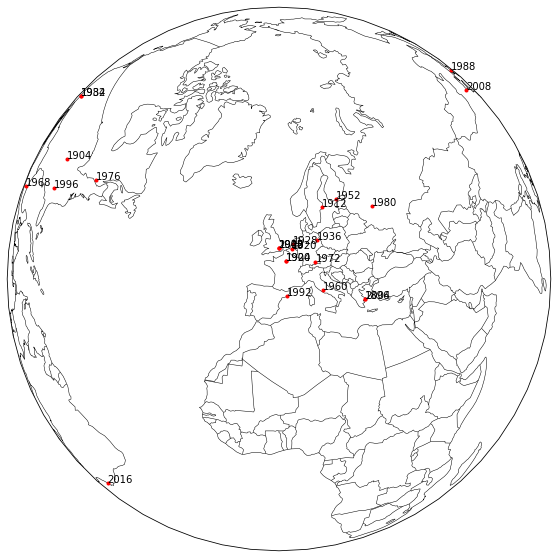

In [17]:
# start a large figure
pp.figure(figsize=(10,10))

# make the projection
axes = pp.axes(projection=cartopy.crs.Orthographic(central_latitude=45, central_longitude=0))

# add boundaries
axes.add_feature(cartopy.feature.COASTLINE, linewidth=0.5)
axes.add_feature(cartopy.feature.BORDERS, linewidth=0.5)

for year, city in cities_by_year.items():        
    lon, lat = coordinates_by_city[city]

    # skip cities on the other side of the globe
    if lon < 130:
        # plot with cartopy coordinate system
        axes.plot(lon, lat, 'r.', transform=cartopy.crs.Geodetic())
        axes.text(lon, lat, year, transform=cartopy.crs.Geodetic())
    
axes.set_global()